In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

path = "/content/drive/My Drive/Feature_Selection/breast_cancer_dataset_medium.csv"
df = pd.read_csv(path)

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension
0,1,M,7.14,14.65,43.11,743.05,0.1282,0.1791,0.1863,0.0760
1,2,B,17.69,8.85,105.40,3963.38,0.1964,0.3989,0.1758,0.0708
2,3,M,17.89,13.81,90.37,3453.29,0.0688,0.2280,0.2830,0.0573
3,4,M,20.02,26.66,113.76,5402.59,0.0525,0.1353,0.1502,0.0404
4,5,M,21.97,21.49,126.56,6741.27,0.1655,0.0958,0.2688,0.0698


In [ ]:
target = "diagnosis"
X = df.drop(columns=[target])
y = df[target]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df2 = df.copy()
df2['diagnosis'] = df2['diagnosis'].map({'M':1, 'B':0})

X = df2.drop(columns=['diagnosis','id'])
y = df2['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Gini_Importance': rf.feature_importances_
}).sort_values(by='Gini_Importance', ascending=False)

importances


,Feature,Gini_Importance
1,texture_mean,0.138282
3,area_mean,0.131275
2,perimeter_mean,0.126990
5,compactness_mean,0.126722
0,radius_mean,0.123219
6,symmetry_mean,0.121672
4,smoothness_mean,0.117629
7,fractal_dimension,0.114211


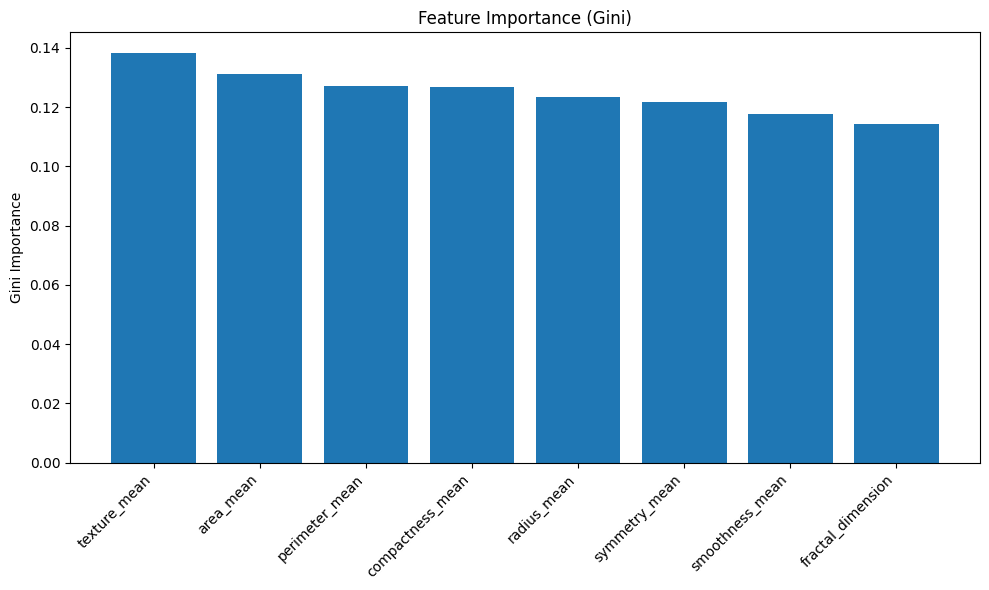

In [ ]:
import matplotlib.pyplot as plt

# Data
features = [
    "texture_mean", "area_mean", "perimeter_mean", "compactness_mean",
    "radius_mean", "symmetry_mean", "smoothness_mean", "fractal_dimension"
]

gini_importance = [
    0.138282, 0.131275, 0.126990, 0.126722,
    0.123219, 0.121672, 0.117629, 0.114211
]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(features, gini_importance)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Gini Importance")
plt.title("Feature Importance (Gini)")
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

path = "/content/drive/My Drive/Feature_Selection/breast_cancer_dataset_medium.csv"
df = pd.read_csv(path)

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension
0,1,M,7.14,14.65,43.11,743.05,0.1282,0.1791,0.1863,0.0760
1,2,B,17.69,8.85,105.40,3963.38,0.1964,0.3989,0.1758,0.0708
2,3,M,17.89,13.81,90.37,3453.29,0.0688,0.2280,0.2830,0.0573
3,4,M,20.02,26.66,113.76,5402.59,0.0525,0.1353,0.1502,0.0404
4,5,M,21.97,21.49,126.56,6741.27,0.1655,0.0958,0.2688,0.0698


In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=9588834ea989b7cba4d86653167b1cd4ce580aeeebd4eceffe8802f61db68015
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from lime.lime_tabular import LimeTabularExplainer

# Load dataset
path = "/content/drive/My Drive/Feature_Selection/breast_cancer_dataset_medium.csv"
df = pd.read_csv(path)

# Specify target column
target = "diagnosis"  # <-- replace with your actual target column

X = df.drop(columns=[target])
y = df[target]

# Encode target if it is categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)


In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X, y)


RandomForestClassifier(n_estimators=500, random_state=42)

In [ ]:
!pip install lime


In [ ]:
sample_index = 0  # change to any row you want
sample = X.iloc[sample_index]


In [ ]:
explainer = LimeTabularExplainer(
    training_data=X.values,
    feature_names=X.columns.tolist(),
    class_names=[str(c) for c in sorted(set(y))],
    mode='classification'
)


In [ ]:
exp = explainer.explain_instance(
    data_row=sample.values,
    predict_fn=rf.predict_proba
)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
local_importance = pd.DataFrame(exp.as_list(), columns=['Feature', 'Contribution'])
local_importance


,Feature,Contribution
0,texture_mean <= 15.87,0.054033
1,area_mean <= 1438.23,0.037206
2,id <= 150.75,-0.026135
3,perimeter_mean <= 65.60,0.024281
4,0.07 < fractal_dimension <= 0.09,-0.012847
5,0.11 < compactness_mean <= 0.20,-0.004606
6,0.15 < symmetry_mean <= 0.20,0.002725
7,0.13 < smoothness_mean <= 0.16,-0.000812
8,radius_mean <= 11.01,-0.000769


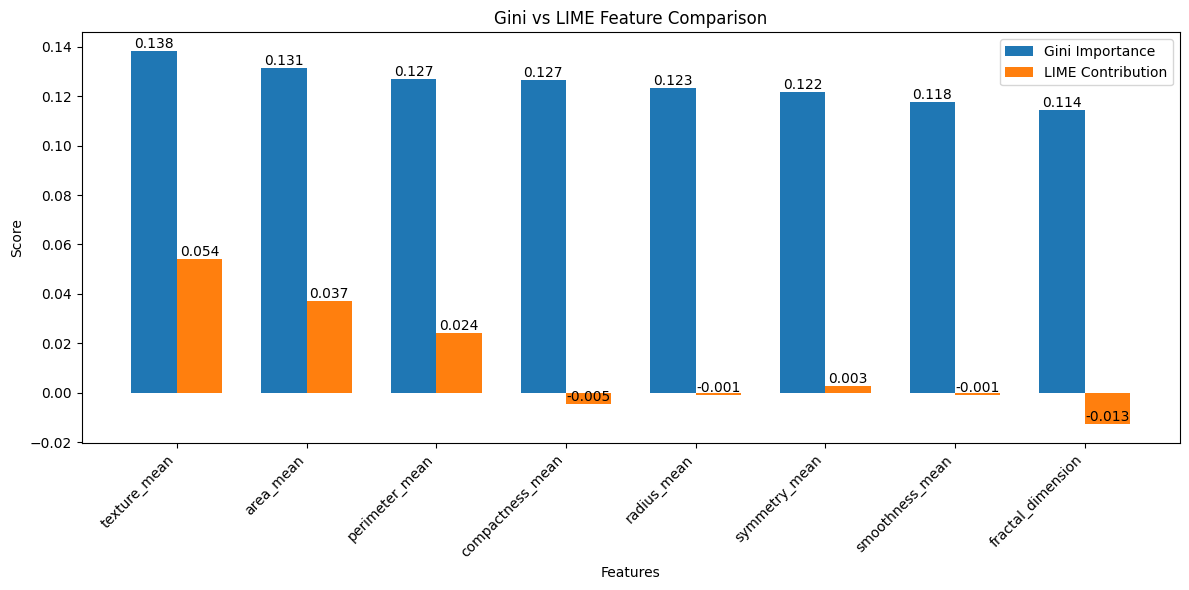

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------- Gini Importance data --------
gini_data = {
    "Feature": [
        "texture_mean", "area_mean", "perimeter_mean",
        "compactness_mean", "radius_mean", "symmetry_mean",
        "smoothness_mean", "fractal_dimension"
    ],
    "Gini_Importance": [
        0.138282, 0.131275, 0.126990, 0.126722,
        0.123219, 0.121672, 0.117629, 0.114211
    ]
}

# -------- LIME Contribution data --------
lime_data = {
    "Feature": [
        "texture_mean", "area_mean", "id", "perimeter_mean",
        "fractal_dimension", "compactness_mean",
        "symmetry_mean", "smoothness_mean", "radius_mean"
    ],
    "LIME_Contribution": [
        0.054033, 0.037206, -0.026135, 0.024281,
        -0.012847, -0.004606, 0.002725, -0.000812, -0.000769
    ]
}

# Convert to DataFrames
df_gini = pd.DataFrame(gini_data)
df_lime = pd.DataFrame(lime_data)

# Merge both tables on Feature
merged = pd.merge(df_gini, df_lime, on="Feature", how="inner")

# Create bar positions
x = np.arange(len(merged["Feature"]))
width = 0.35

# Plot
plt.figure(figsize=(12,6))
plt.bar(x - width/2, merged["Gini_Importance"], width, label="Gini Importance")
plt.bar(x + width/2, merged["LIME_Contribution"], width, label="LIME Contribution")

# Add labels
plt.xticks(x, merged["Feature"], rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Score")
plt.title("Gini vs LIME Feature Comparison")

# Add value labels
for i, v in enumerate(merged["Gini_Importance"]):
    plt.text(i - width/2, v, f"{v:.3f}", ha='center', va='bottom')

for i, v in enumerate(merged["LIME_Contribution"]):
    plt.text(i + width/2, v, f"{v:.3f}", ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
# 1. Load Dataset

path = "/content/drive/My Drive/Feature_Selection/breast_cancer_dataset_medium.csv"
df = pd.read_csv(path)

target = "diagnosis"  # <-- Replace with your actual target column

X = df.drop(columns=[target])
y = df[target]

# Encode target if categorical
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

feature_names = X.columns.tolist()

# 2. Train Random Forest (for prediction)
rf = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1)
rf.fit(X, y)
# 3. Initialize LIME Explainer
explainer = LimeTabularExplainer(
    training_data=X.values,
    feature_names=feature_names,
    class_names=[str(c) for c in sorted(set(y))],
    mode='classification'
)
# 4. Compute Global LIME Importance
lime_global = {feat: 0 for feat in feature_names}

# Loop over all samples (can sample subset if dataset is huge)
for i in range(len(X)):
    exp = explainer.explain_instance(
        data_row=X.iloc[i].values,
        predict_fn=rf.predict_proba
    )
    # accumulate absolute weights per feature
    for feat, weight in exp.as_list():
        # extract raw feature name (remove numeric ranges)
        clean_feat = feat.split("<")[0].split(">")[-1].split("=")[0].strip()
        if clean_feat in lime_global:
            lime_global[clean_feat] += abs(weight)

# Convert to DataFrame
lime_global_df = pd.DataFrame({
    "Feature": feature_names,
    "LIME_Global": [lime_global[f] for f in feature_names]
}).sort_values(by="LIME_Global", ascending=False).reset_index(drop=True)



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local

In [ ]:
# Sort features by LIME global importance
lime_global_df_sorted = lime_global_df.sort_values(by='LIME_Global', ascending=False).reset_index(drop=True)

# Add rank column
lime_global_df_sorted['LIME_Rank'] = lime_global_df_sorted['LIME_Global'].rank(ascending=False).astype(int)

lime_global_df_sorted


,Feature,LIME_Global,LIME_Rank
0,texture_mean,9.123975,1
1,symmetry_mean,7.050252,2
2,area_mean,4.899896,3
3,id,4.021426,4
4,perimeter_mean,3.885071,5
5,smoothness_mean,2.322098,6
6,compactness_mean,1.676443,7
7,fractal_dimension,1.021534,8
8,radius_mean,0.348944,9


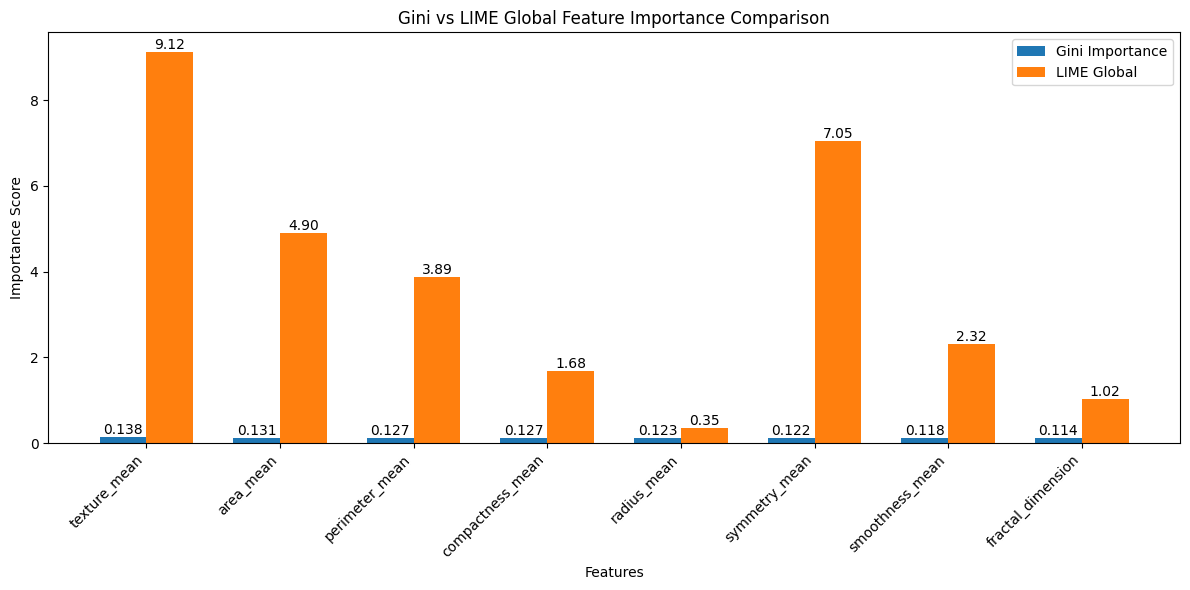

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----- Gini data -----
gini_data = {
    "Feature": [
        "texture_mean", "area_mean", "perimeter_mean",
        "compactness_mean", "radius_mean", "symmetry_mean",
        "smoothness_mean", "fractal_dimension"
    ],
    "Gini_Importance": [
        0.138282, 0.131275, 0.126990, 0.126722,
        0.123219, 0.121672, 0.117629, 0.114211
    ]
}

# ----- LIME Global data -----
lime_data = {
    "Feature": [
        "texture_mean", "symmetry_mean", "area_mean",
        "id", "perimeter_mean", "smoothness_mean",
        "compactness_mean", "fractal_dimension", "radius_mean"
    ],
    "LIME_Global": [
        9.123975, 7.050252, 4.899896, 4.021426,
        3.885071, 2.322098, 1.676443, 1.021534, 0.348944
    ]
}

# Convert to DataFrame
df_gini = pd.DataFrame(gini_data)
df_lime = pd.DataFrame(lime_data)

# Merge by common features
merged = pd.merge(df_gini, df_lime, on="Feature", how="inner")

# Bar positions
x = np.arange(len(merged["Feature"]))
width = 0.35

# Plot
plt.figure(figsize=(12,6))
plt.bar(x - width/2, merged["Gini_Importance"], width, label="Gini Importance")
plt.bar(x + width/2, merged["LIME_Global"], width, label="LIME Global")

# Labels
plt.xticks(x, merged["Feature"], rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Gini vs LIME Global Feature Importance Comparison")

# Value labels
for i, v in enumerate(merged["Gini_Importance"]):
    plt.text(i - width/2, v, f"{v:.3f}", ha="center", va="bottom")

for i, v in enumerate(merged["LIME_Global"]):
    plt.text(i + width/2, v, f"{v:.2f}", ha="center", va="bottom")

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# ----- Gini data -----
gini_data = {
    "Feature": [
        "texture_mean", "area_mean", "perimeter_mean",
        "compactness_mean", "radius_mean", "symmetry_mean",
        "smoothness_mean", "fractal_dimension"
    ],
    "Gini_Importance": [
        0.138282, 0.131275, 0.126990, 0.126722,
        0.123219, 0.121672, 0.117629, 0.114211
    ]
}

# ----- LIME Local data -----
lime_local_data = {
    "Feature": [
        "texture_mean", "area_mean", "id", "perimeter_mean",
        "fractal_dimension", "compactness_mean",
        "symmetry_mean", "smoothness_mean", "radius_mean"
    ],
    "LIME_Local_Contribution": [
        0.054033, 0.037206, -0.026135, 0.024281,
        -0.012847, -0.004606, 0.002725, -0.000812, -0.000769
    ]
}

# ----- LIME Global data (used for ranking order) -----
lime_global_data = {
    "Feature": [
        "texture_mean", "symmetry_mean", "area_mean",
        "id", "perimeter_mean", "smoothness_mean",
        "compactness_mean", "fractal_dimension", "radius_mean"
    ],
    "LIME_Global_Importance": [
        9.123975, 7.050252, 4.899896, 4.021426,
        3.885071, 2.322098, 1.676443, 1.021534, 0.348944
    ]
}

# Convert to DataFrames
df_gini = pd.DataFrame(gini_data)
df_lime_local = pd.DataFrame(lime_local_data)
df_lime_global = pd.DataFrame(lime_global_data)

# Merge all tables
merged = pd.merge(df_gini, df_lime_local, on="Feature", how="outer")
merged = pd.merge(merged, df_lime_global, on="Feature", how="outer")

# Sort by LIME Global Importance (ranking logic, but no rank column shown)
merged = merged.sort_values(by="LIME_Global_Importance", ascending=False)

# Reset index
merged = merged.reset_index(drop=True)

# Print final table
print(merged)


             Feature  Gini_Importance  LIME_Local_Contribution  \
0       texture_mean         0.138282                 0.054033   
1      symmetry_mean         0.121672                 0.002725   
2          area_mean         0.131275                 0.037206   
3                 id              NaN                -0.026135   
4     perimeter_mean         0.126990                 0.024281   
5    smoothness_mean         0.117629                -0.000812   
6   compactness_mean         0.126722                -0.004606   
7  fractal_dimension         0.114211                -0.012847   
8        radius_mean         0.123219                -0.000769   

   LIME_Global_Importance  
0                9.123975  
1                7.050252  
2                4.899896  
3                4.021426  
4                3.885071  
5                2.322098  
6                1.676443  
7                1.021534  
8                0.348944  


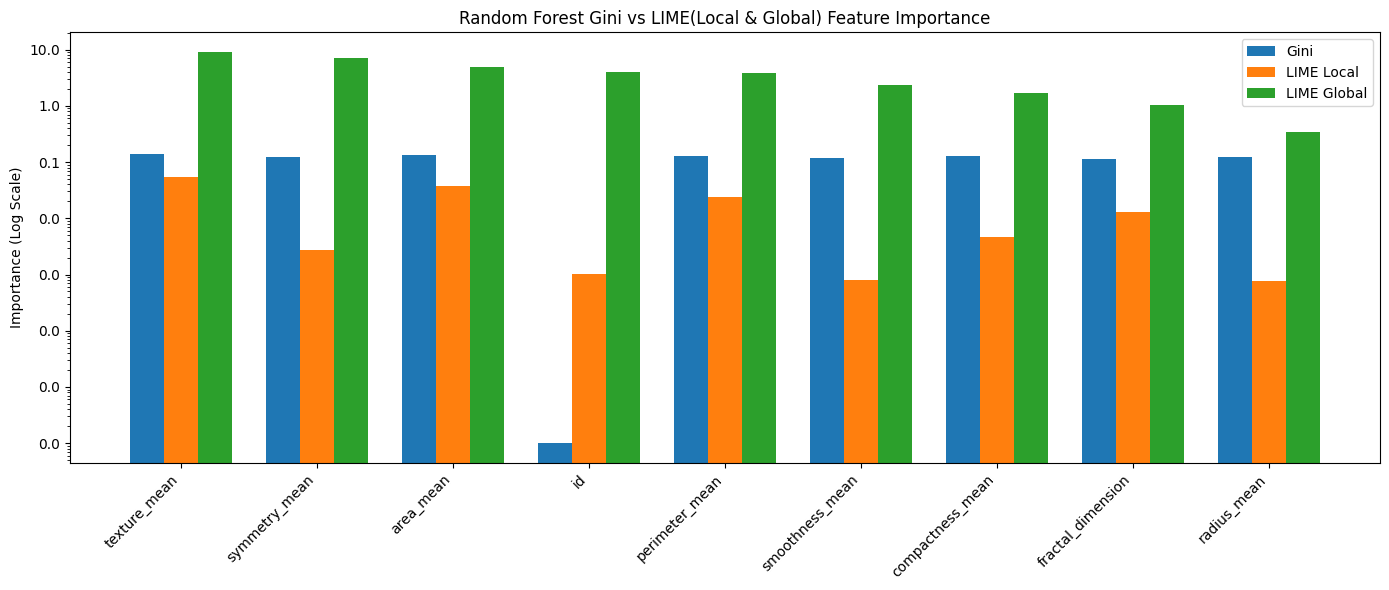

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import LogLocator, ScalarFormatter

# Data
features = [
    "texture_mean","symmetry_mean","area_mean","id",
    "perimeter_mean","smoothness_mean","compactness_mean",
    "fractal_dimension","radius_mean"
]

gini = np.array([0.138282,0.121672,0.131275,1e-6,
                 0.126990,0.117629,0.126722,0.114211,0.123219])

lime_local = np.array([0.054033,0.002725,0.037206,0.001,
                       0.024281,0.000812,0.004606,0.012847,0.000769])

# Convert negatives to tiny positive values to work with log scale
lime_local = np.abs(lime_local) + 1e-6

lime_global = np.array([9.123975,7.050252,4.899896,4.021426,
                        3.885071,2.322098,1.676443,1.021534,0.348944])

# Bar positions
x = np.arange(len(features))
width = 0.25

fig, ax = plt.subplots(figsize=(14,6))

ax.bar(x - width, gini, width, label="Gini")
ax.bar(x, lime_local, width, label="LIME Local")
ax.bar(x + width, lime_global, width, label="LIME Global")

# Log scale + dense ticks
ax.set_yscale('log')
ax.yaxis.set_major_locator(LogLocator(base=10.0, numticks=15))
ax.yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=15))
ax.yaxis.set_major_formatter(ScalarFormatter())

# Labels
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha="right")
ax.set_ylabel("Importance (Log Scale)")
ax.set_title("Random Forest Gini vs LIME(Local & Global) Feature Importance")

plt.legend()
plt.tight_layout()
plt.show()
